Name: Vaibhav Dixit
PGID: 12110100

In [169]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import os
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
from sklearn.metrics import accuracy_score

In [136]:
df_Q4 = pd.read_csv("D:/ISB_AMPBA/MLSL/Individual_Assignment/Q1/digit-recognizer/train.csv")

In [137]:
df_Q4.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [138]:
#Splitting the Data
Y = df_Q4['label']
X = df_Q4[df_Q4.columns[1:]]

In [139]:
# Standardizing the data 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X)

In [141]:
# Applying 9 dimensional PCA 

from sklearn.decomposition import PCA
pca = PCA(n_components = 9)

In [142]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_proj = pca.fit_transform(X_train_std)
print(X_proj.shape)

(42000, 9)


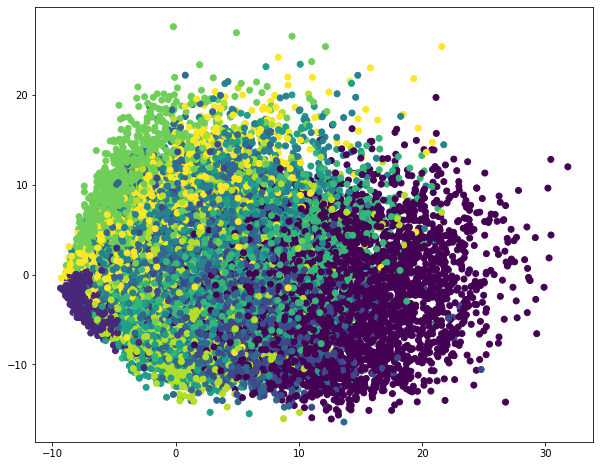

In [143]:
# Plotting the projected principal components and try to understand the data. 
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize = (10,8))
plt.scatter(X_proj[:,0], X_proj[:,1], c=Y)
plt.show()

In [144]:
#Splitiing the data into 65% and 35%

X_train, X_test, y_train, y_test = train_test_split( 
          X_proj, Y, test_size = 0.35, random_state = 100)

In [145]:
Y.shape

(42000,)

# Building Decision tree classifier with given Max depth = 5 and purity threshold = 0.8
# Purity threshold = 1 - impurity_decrease. Therefore, for 0.8 purity we set min_impurity_decrease = 0.2

In [146]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [147]:
clf_PCA=DecisionTreeClassifier(criterion = 'entropy',max_depth = 5, min_impurity_decrease = 0.2)

clf_PCA.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5,
                       min_impurity_decrease=0.2)

In [153]:
y_train_pred_PCA = clf_PCA.predict(X_train)
y_test_pred_PCA = clf_PCA.predict(X_test)

In [149]:
#Applying KNN classifier on the data with K= 5 and printing the confusion matrix and score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
pred1 = knn.predict(X_train)

print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[1393    0    6    3    5   17   17    0    2    0]
 [   1 1625    6    5    3    2    5    1    5    2]
 [  15    1 1315   16    7    8    8   10   27    3]
 [  10   13   49 1277   20   39    2   11   87    5]
 [   2    8   14    2 1098   11   11   19    9  216]
 [  45    3    2   74   26 1128   20    4   52   10]
 [  20    2    5    1    9    8 1427    0    0    0]
 [   1   14   13    8   17    4    0 1376    3   77]
 [  24   15   21   62   36   73    9    8 1170   24]
 [  10   10    1   12  260   13    1   66   27 1098]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1443
           1       0.96      0.98      0.97      1655
           2       0.92      0.93      0.93      1410
           3       0.87      0.84      0.86      1513
           4       0.74      0.79      0.76      1390
           5       0.87      0.83      0.85      1364
           6       0.95      0.97      0.96      1472
           7       0.92      0.91   

In [157]:
#Accuracy score for train/test data applying Decision tree on PCA data set  
atp=accuracy_score(y_train,y_train_pred_PCA)
attp=accuracy_score(y_test,y_test_pred_PCA)

print("The accuracy score of the train data set applying Decision tree on  PCA is",atp)
print("The accuracy score of the test data set applying Decision tree on PCA is",attp)

The accuracy score of the train data set for PCA is 0.2886813186813187
The accuracy score of the test data set for PCA is 0.28006802721088436


In [156]:
#Accuracy score for train/test data applyinf KNN on PCA data set 
atr=(accuracy_score(y_train,pred1))
att=(accuracy_score(y_test,pred))

print("The accuracy score for the train data set applying KNN is",atr)
print("The accuracy score for the test data set applying KNN is",att)

The accuracy score for the train data set applying KNN is 0.9186080586080586
The accuracy score for the test data set applying KNN is 0.8780272108843538


# LDA

In [158]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# LDA
sklearn_lda = LDA(n_components=9)
X_lda_sklearn = sklearn_lda.fit_transform(X, Y)

In [159]:
X_lda_sklearn.shape

(42000, 9)

In [160]:
#Splitiing the data into 65% and 35%

X_train, X_test, y_train, y_test = train_test_split( 
          X_lda_sklearn, Y, test_size = 0.35, random_state = 100)

# Building Decision tree classifier with given Max depth = 5 and purity threshold = 0.8
# Purity threshold = 1 - impurity_decrease. Therefore, for 0.8 purity we set min_impurity_decrease = 0.2

In [162]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_lda_sklearn, Y)

DecisionTreeClassifier()

In [164]:
clf=DecisionTreeClassifier(criterion = 'entropy',max_depth = 5, min_impurity_decrease = 0.2)

clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5,
                       min_impurity_decrease=0.2)

In [165]:
#Applying KNN classifier on the data with K= 5 and printing the confusion matrix and score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
pred1 = knn.predict(X_train)

print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[1413    0    6    3    0    8    6    4    2    1]
 [   0 1612   13    4    2    2    1    6   14    1]
 [  16   14 1294   20   15    3   13   13   19    3]
 [   2   11   36 1357    1   42    5   15   34   10]
 [   1    4   11    0 1294    3    6    3    9   59]
 [  18   12    9   57   10 1180   27   11   32    8]
 [  18    4    8    0    3   16 1415    0    4    4]
 [   2   25   16    8   19    2    0 1406    2   33]
 [   7   62   22   44   19   52   23    5 1189   19]
 [   8    6    4   12   70   15    2   34   12 1335]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1443
           1       0.92      0.97      0.95      1655
           2       0.91      0.92      0.91      1410
           3       0.90      0.90      0.90      1513
           4       0.90      0.93      0.92      1390
           5       0.89      0.87      0.88      1364
           6       0.94      0.96      0.95      1472
           7       0.94      0.93   

In [166]:
y_train_pred = clf.predict(X_train)
y_test_pred= clf.predict(X_test)

In [168]:
#Accuracy score for train/test data applying Decision tree on LDA data set  
atpl=accuracy_score(y_train,y_train_pred)
attpl=accuracy_score(y_test,y_test_pred)

print("The accuracy score of the train data set applying Decision tree on  LDA is",atpl)
print("The accuracy score of the test data set applying Decision tree on LDA is",attpl)

The accuracy score of the train data set applying Decision tree on  LDA is 0.4657875457875458
The accuracy score of the test data set applying Decision tree on LDA is 0.46523809523809523


In [167]:
#Accuracy score for train/test dataset applying KNN on LDA is
atrl=(accuracy_score(y_train,pred1))
attl=(accuracy_score(y_test,pred))

print("The accuracy score for the train data set applying KNN on LDA is  is",atrl)
print("The accuracy score for the test data set applying KNN on LDA is",attl)

The accuracy score for the train data is 0.9364102564102564
The accuracy score for the test data  is 0.9180272108843538


The conclusions about projection method is 

- Accuracy increases when KNN is applied on data set after PCA and LDA. However, accuracy percentage of decision tree is low so we recommend KNN on the data set 
- If one needs to do fast computation without taking in factor of accuracy. He can go with decision tree